Advanced descriptive statistics on the diabetes dataset.

We shall go through techniques like distribution analysis, outlier detection, hypothesis testing, confidence intervals, and data transformation.

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

Let us load the dataset

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

Distribution Analysis

We shall analyze the distribution of each feature to understand its shape, central tendency, and spread.

Histograms and Kernel Density Estimation (KDE)

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

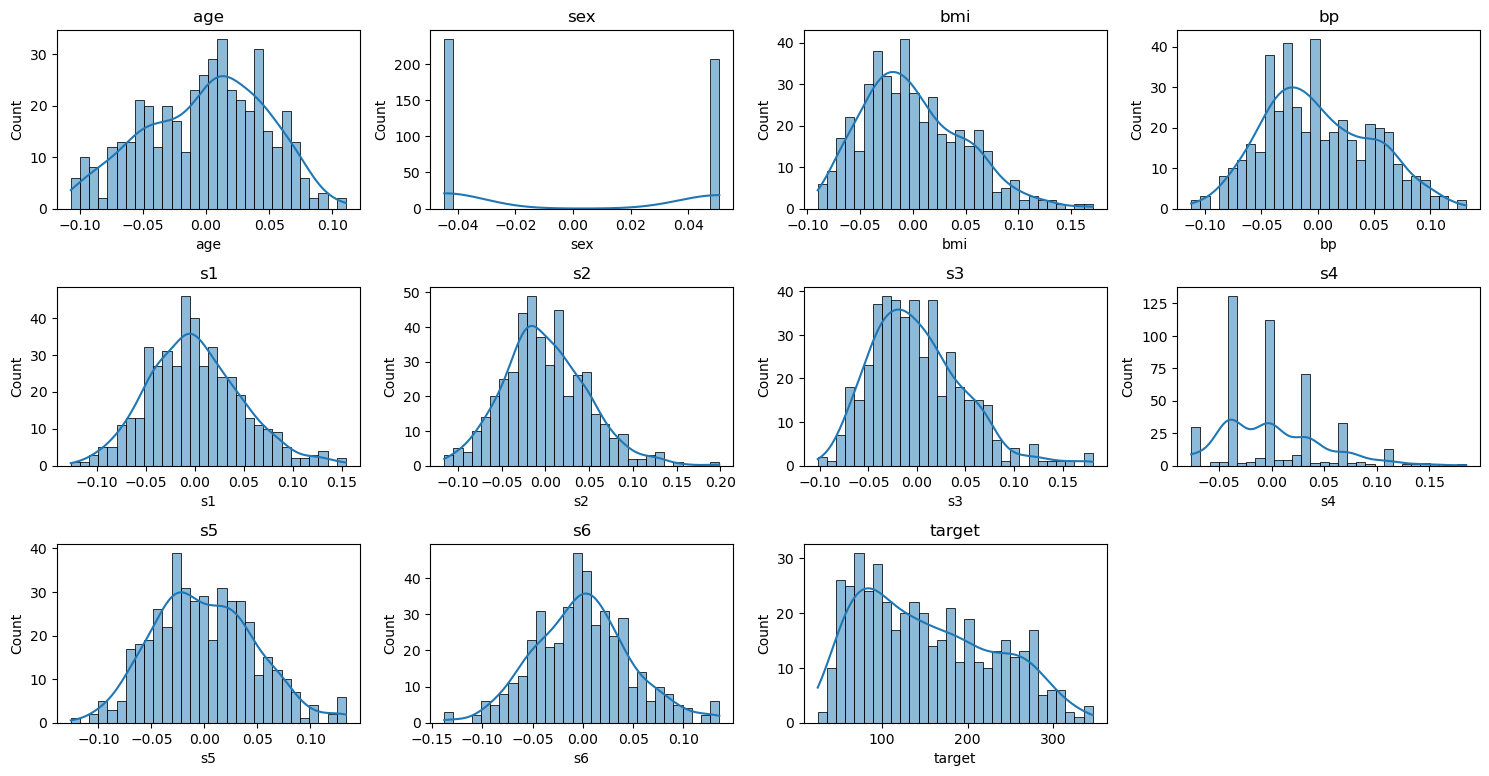

In [3]:
# Plot histograms and KDE for all features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

Quantile-Quantile (Q-Q) Plots

Check if the data follows a normal distribution.

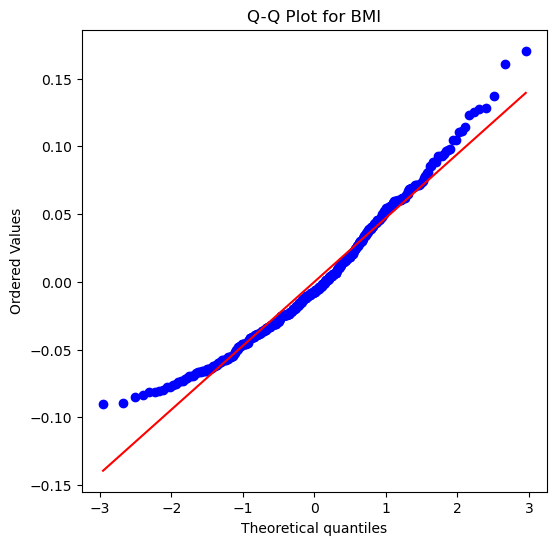

In [4]:
# Q-Q plot for a specific feature (e.g., 'bmi')
plt.figure(figsize=(6, 6))
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title("Q-Q Plot for BMI")
plt.show()

Outlier Detection

This helps us identify outliers in the dataset using statistical methods.

Z-Score Method

Outliers are data points with a Z-score greater than 3 or less than -3.

In [5]:
from scipy.stats import zscore

# Calculate Z-scores for all columns
z_scores = np.abs(zscore(df))

# Identify outliers
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers detected:", outliers.sum())
print("Outlier rows:\n", df[outliers])

Number of outliers detected: 12
Outlier rows:
           age       sex       bmi        bp        s1        s2        s3  \
58   0.041708 -0.044642 -0.064408  0.035644  0.012191 -0.057994  0.181179   
123  0.005383  0.050680  0.034751 -0.001091  0.152538  0.198788 -0.061809   
216  0.012648  0.050680  0.035829  0.049415  0.053469  0.074155 -0.069172   
230 -0.038207  0.050680  0.071397 -0.057313  0.153914  0.155887  0.000779   
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.019790 -0.047082   
260  0.041708 -0.044642 -0.008362 -0.057313  0.008063 -0.031376  0.151726   
261  0.048974 -0.044642 -0.041774  0.104501  0.035582 -0.025739  0.177497   
269  0.009016 -0.044642 -0.032073 -0.026328  0.042462 -0.010395  0.159089   
322  0.023546  0.050680  0.061696  0.062050  0.024574 -0.036073 -0.091262   
336 -0.020045 -0.044642  0.085408 -0.036656  0.091996  0.089499 -0.061809   
367 -0.009147  0.050680  0.170555  0.014987  0.030078  0.033759 -0.021311   
441 -0.045472 -0.044642 -0.07

Interquartile Range (IQR) Method

Outliers are data points outside the range [Q1 - 1.5IQR, Q3 + 1.5IQR].

In [6]:
# Calculate IQR for a specific feature (e.g., 'bmi')
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = (df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
print("Number of outliers detected (IQR method):", outliers_iqr.sum())
print("Outlier rows:\n", df[outliers_iqr])

Number of outliers detected (IQR method): 3
Outlier rows:
           age       sex       bmi        bp        s1        s2        s3  \
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.019790 -0.047082   
366 -0.045472  0.050680  0.137143 -0.015999  0.041086  0.031880 -0.043401   
367 -0.009147  0.050680  0.170555  0.014987  0.030078  0.033759 -0.021311   

           s4        s5        s6  target  
256  0.034309  0.028020  0.011349   346.0  
366  0.071210  0.071019  0.048628   233.0  
367  0.034309  0.033654  0.032059   242.0  


Hypothesis Testing

We can perform statistical tests to check assumptions or relationships.

Shapiro-Wilk Test for Normality

Here, we test if a feature follows a normal distribution.

In [7]:
# Shapiro-Wilk test for a specific feature (e.g., 'bmi')
stat, p = stats.shapiro(df['bmi'])
print("Shapiro-Wilk Test for BMI:")
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

Shapiro-Wilk Test for BMI:
Statistic: 0.9728217720985413, p-value: 2.5202027131854265e-07
Data is not normally distributed (reject H0)


Pearson Correlation Test

This can be used to test the correlation between two features.

In [8]:
# Pearson correlation test between 'bmi' and 'target'
corr, p_value = stats.pearsonr(df['bmi'], df['target'])
print("Pearson Correlation between BMI and Target:")
print(f"Correlation: {corr}, p-value: {p_value}")

Pearson Correlation between BMI and Target:
Correlation: 0.5864501344746886, p-value: 3.4660064451673575e-42


Confidence Intervals

We can calculate confidence intervals for the mean of a feature.

In [11]:
# Confidence interval for the mean of 'bmi'
confidence_level = 0.95
mean = df['bmi'].mean()
std_err = stats.sem(df['bmi'])  # Standard error of the mean
ci = stats.t.interval(confidence_level, len(df['bmi'])-1, loc=mean, scale=std_err)
print(f"95% Confidence Interval for BMI Mean: {ci}")

95% Confidence Interval for BMI Mean: (-0.004451549462177969, 0.004451549462177519)


Advanced Visualization

We shall use advanced visualizations to explore relationships and patterns.

Boxplots for Outlier Detection

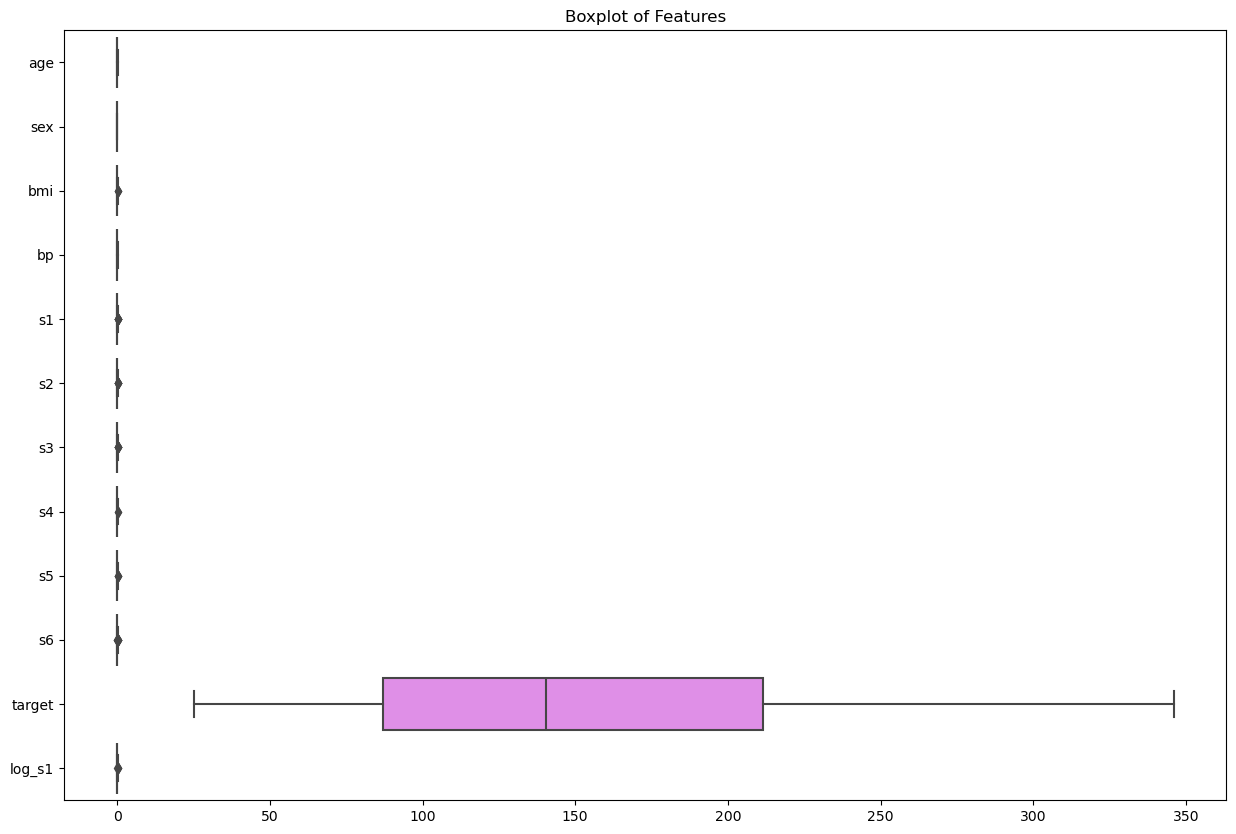

In [12]:
# Boxplot for all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features")
plt.show()

Pairplot with Hue

Visualize relationships between features, colored by a categorical variable (e.g., target quartiles).

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is dep

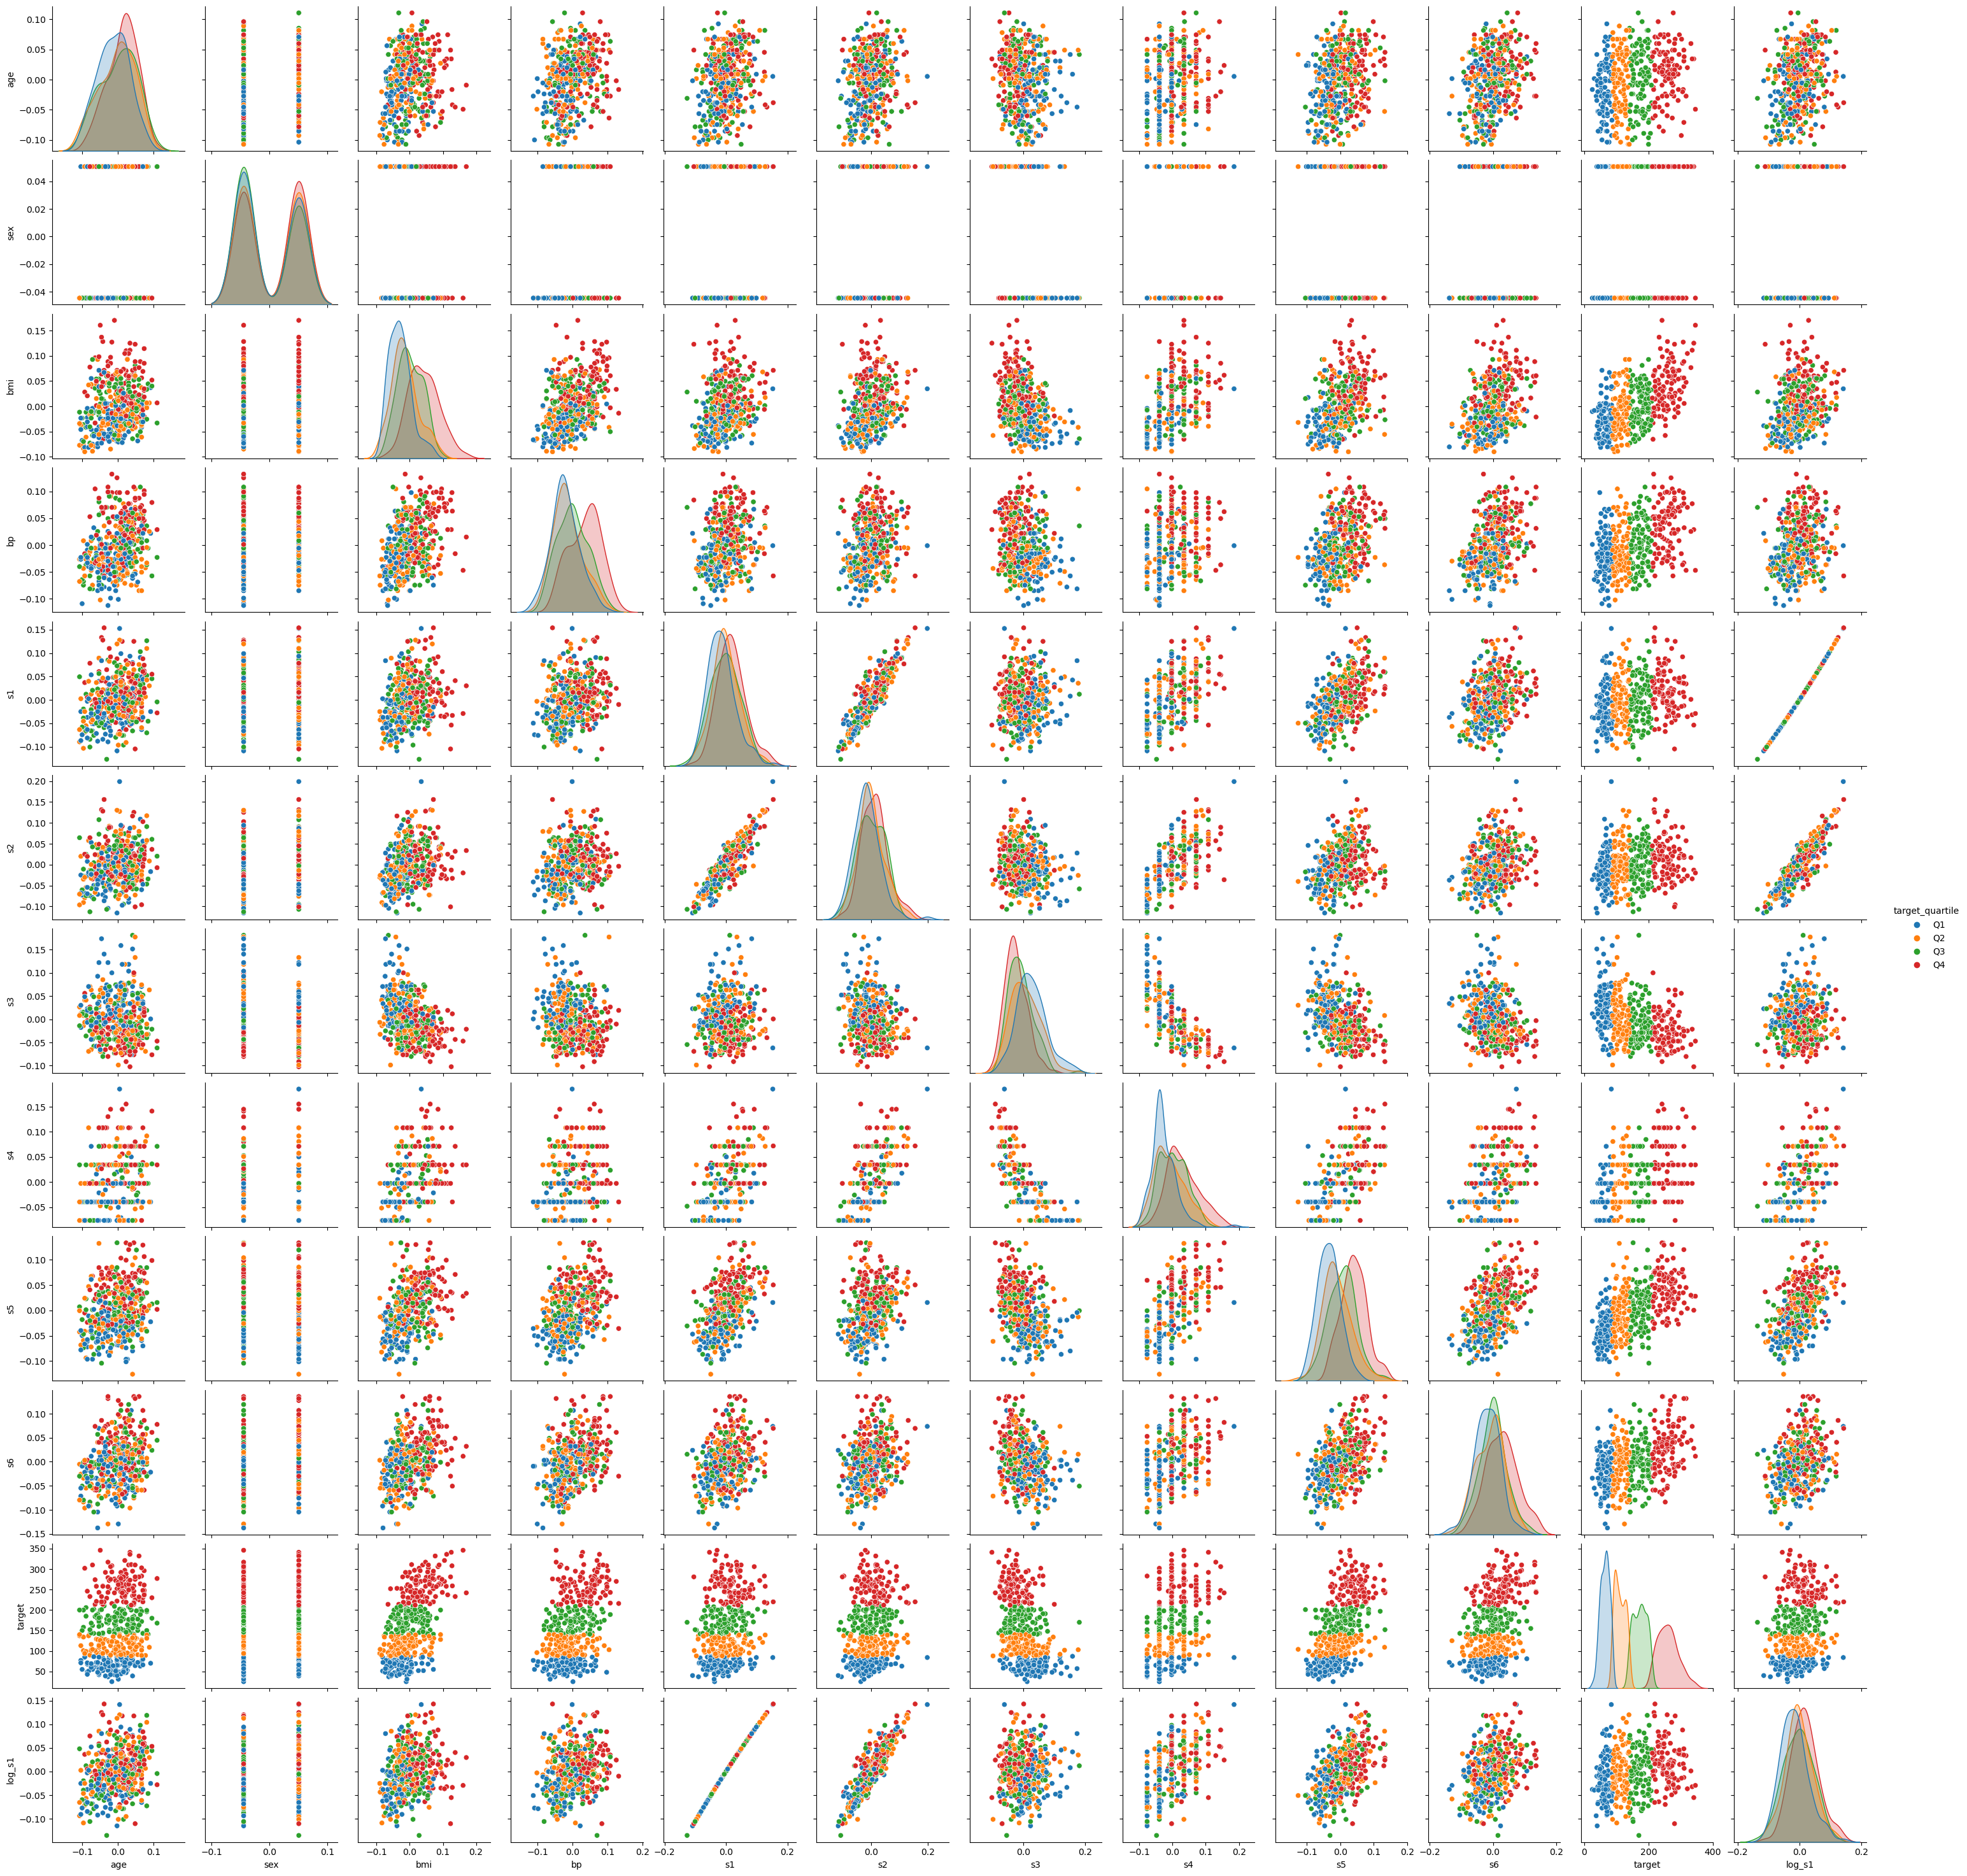

In [14]:
# Create quartiles for the target variable
df['target_quartile'] = pd.qcut(df['target'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Pairplot with hue
sns.pairplot(df, hue='target_quartile', diag_kind='kde')
plt.show()